In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [69]:
df = pd.read_csv('/content/StockDataWithoutClusters_v2.csv')

In [70]:
df

,Company,Sector,Price,Market Cap,Free Float Market Cap %,6m ADV,RoE %,RoCE %,EBIT Margin %,EPS,PAT %,Stock Return %
0,Hindustan Oil Exploration Company Ltd.,Crude Oil,68.40,131.299505,0.8371,1.136947,-1.000000,-0.046311,-0.923766,4.533827,-1.000000,90.794979
1,United Breweries (Holdings) Ltd.,Alcohol,40.00,39.316572,0.4766,0.162805,-1.000000,-0.535856,-1.000000,158.744001,-1.000000,38.169257
2,Hindustan Motors Ltd.,Auto & Auto Anc.,7.15,21.946366,0.6766,0.041085,-0.868864,-1.000000,-1.000000,6.880137,-1.000000,-8.333333
3,HMT Ltd.,Industrials,42.85,477.697516,0.0631,0.013322,-0.183166,-0.167937,-1.000000,5.865182,-1.000000,-23.070018
4,ABG Shipyard Ltd.,Industrials,31.10,24.718436,0.8177,0.178504,-0.766749,-0.051679,-0.865160,182.175768,-1.000000,-57.014513
...,...,...,...,...,...,...,...,...,...,...,...,...
1220,Gammon Infrastructure Projects Ltd.,Infra.,3.70,51.261748,0.4156,0.051188,0.058122,0.134832,0.076953,137.198394,0.030488,-45.985401
1221,Gammon India Ltd.,Infra.,12.35,67.008886,0.8717,0.080642,0.058122,0.134832,0.076953,137.198394,0.030488,-39.460784
1222,Nelco Ltd.,Telecom,81.50,27.356569,0.4990,0.179230,0.058122,0.134832,0.076953,137.198394,0.030488,-33.087028
1223,Walchandnagar Industries Ltd.,Cap. Goods,149.60,83.779090,0.4500,0.351220,0.058122,0.134832,0.076953,137.198394,0.030488,-17.734396


In [71]:
df.describe()

,Price,Market Cap,Free Float Market Cap %,6m ADV,RoE %,RoCE %,EBIT Margin %,EPS,PAT %,Stock Return %
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000
mean,524.523282,1007.097584,0.424991,1.476287,0.058122,0.134832,0.076953,137.198393,0.030488,7.087798
std,1975.921838,3977.721963,0.156296,4.790404,0.252640,0.158477,0.170725,318.540047,0.174218,50.988015
min,0.350000,1.027453,0.062600,0.000004,-1.000000,-1.000000,-1.000000,0.234502,-1.000000,-91.128010
25%,60.550000,40.744259,0.291800,0.029050,0.013930,0.054159,0.033746,24.568699,0.006542,-21.670429
50%,170.100000,113.898556,0.403800,0.123546,0.089812,0.116647,0.076953,56.775656,0.039354,-1.576713
75%,448.050000,417.201805,0.512300,0.548840,0.170942,0.196777,0.133447,125.772649,0.086485,25.083403
max,51579.200000,66127.302990,1.000000,52.834197,1.000000,1.000000,1.000000,6136.311392,1.000000,586.043761


In [72]:
cat_cols = ['Company','Sector']
num_cols = df.select_dtypes(include='number').columns.to_list()
df[num_cols].skew()

,0
Price,17.146752
Market Cap,9.058568
Free Float Market Cap %,0.769714
6m ADV,6.217244
RoE %,-2.060722
RoCE %,0.064536
EBIT Margin %,-1.987305
EPS,8.980235
PAT %,-1.888789
Stock Return %,3.009798


In [73]:
print(df[df['RoE %'] == -1].shape[0])
print(df[df['RoCE %'] == -1].shape[0])
print(df[df['EBIT Margin %'] == -1].shape[0])
print(df[df['PAT %'] == -1].shape[0])

28
2
9
10


In [74]:
df.replace(-1, np.nan, inplace=True)

In [75]:
outliers = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

In [76]:
for col in num_cols:
  df[col] = np.log1p(df[col])      # Apply log transformation - log1p used to be safe for zero values

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log1p



In [77]:
df[num_cols].skew()

,0
Price,-0.495891
Market Cap,0.079227
Free Float Market Cap %,0.396269
6m ADV,1.000814
RoE %,-0.556415
RoCE %,0.055629
EBIT Margin %,-0.099977
EPS,-0.354821
PAT %,-0.205796
Stock Return %,-1.166524


In [78]:
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

## New Features possible

- PE_Ratio	(Price / EPS )
  - Valuation
- EPS_to_Price	(EPS / Price)
  - Return per unit price
- RoE_minus_RoCE	(RoE - RoCE)
  - Leverage effect
- PAT_to_EBIT	(PAT / EBIT Margin)
  - Net to operating profit efficiency

In [79]:
df['PE_Ratio'] = df['Price'] / df['EPS']

df['EPS_to_Price'] = df['EPS'] / df['Price']

df['RoE_minus_RoCE'] = df['RoE %'] - df['RoCE %']

df['PAT_to_EBIT'] = df['PAT %'] / df['EBIT Margin %']

In [80]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)

### Dimensionality Reduction Techniques

To visualize high-dimensional financial data and enhance clustering quality, three dimensionality reduction techniques were explored:

- **PCA (Principal Component Analysis):** Captures variance linearly, good for compressing information.
- **t-SNE (t-Distributed Stochastic Neighbor Embedding):** Non-linear; helps visualize local groupings in a 2D space.
- **UMAP (Uniform Manifold Approximation and Projection):** Balances local and global structure preservation; works well with clustering.

In [81]:
pca = PCA(n_components=0.95, random_state=42)
pca_components = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(pca_components)

In [82]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(df_scaled)

tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

In [83]:
import umap.umap_ as umap

umap_model = umap.UMAP(n_components=2, random_state=42)
umap_components = umap_model.fit_transform(df_scaled)

umap_df = pd.DataFrame(umap_components, columns=['UMAP1', 'UMAP2'])

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



# Modeling

## K-Means

In [84]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

k_range = range(2, 16)

### K-Means with PCA

In [85]:
pca_inertia = []
pca_sil_k = []
pca_ch_k = []
pca_dbi_k = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(pca_df)
    pca_inertia.append(kmeans.inertia_)
    pca_sil_k.append(silhouette_score(pca_df, kmeans.labels_))
    pca_dbi_k.append(davies_bouldin_score(pca_df, kmeans.labels_))
    pca_ch_k.append(calinski_harabasz_score(pca_df, kmeans.labels_))

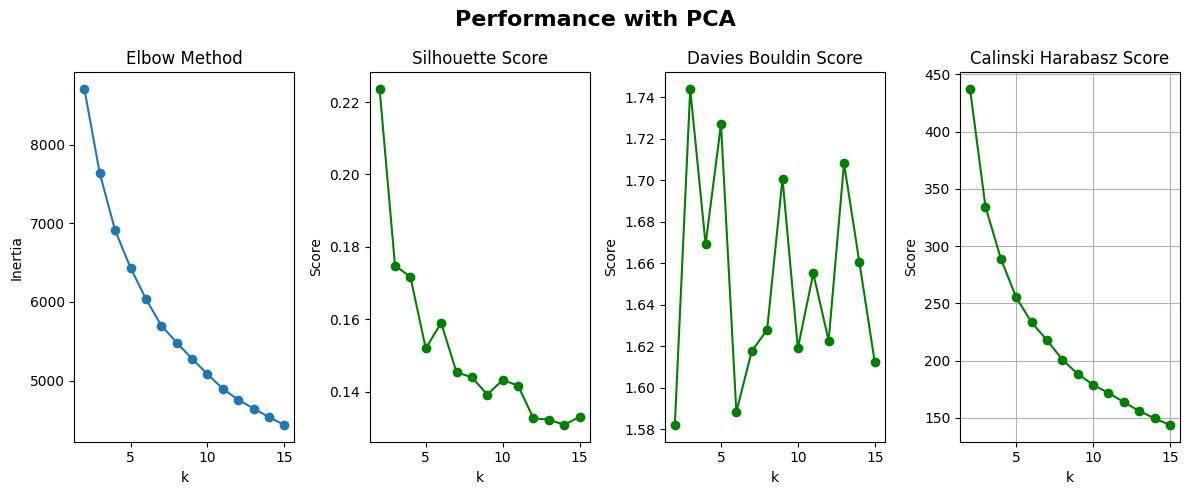

In [86]:
fig, axs = plt.subplots(1, 4, figsize=(12, 5))

fig.suptitle('Performance with PCA', fontsize=16, fontweight='bold')

axs[0].plot(k_range, pca_inertia, marker='o')
axs[0].set_title('Elbow Method')
axs[0].set_xlabel('k')
axs[0].set_ylabel('Inertia')

axs[1].plot(k_range, pca_sil_k, marker='o', color='green')
axs[1].set_title('Silhouette Score')
axs[1].set_xlabel('k')
axs[1].set_ylabel('Score')

axs[2].plot(k_range, pca_dbi_k, marker='o', color='green')
axs[2].set_title('Davies Bouldin Score')
axs[2].set_xlabel('k')
axs[2].set_ylabel('Score')

axs[3].plot(k_range, pca_ch_k, marker='o', color='green')
axs[3].set_title('Calinski Harabasz Score')
axs[3].set_xlabel('k')
axs[3].set_ylabel('Score')

plt.tight_layout()
plt.grid()
plt.show()

### K-Means with UMAP

In [87]:
umap_inertia = []
umap_sil_k = []
umap_dbi_k = []
umap_ch_k = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(umap_df)
    umap_inertia.append(kmeans.inertia_)
    umap_sil_k.append(silhouette_score(umap_df, kmeans.labels_))
    umap_dbi_k.append(davies_bouldin_score(umap_df, kmeans.labels_))
    umap_ch_k.append(calinski_harabasz_score(umap_df, kmeans.labels_))

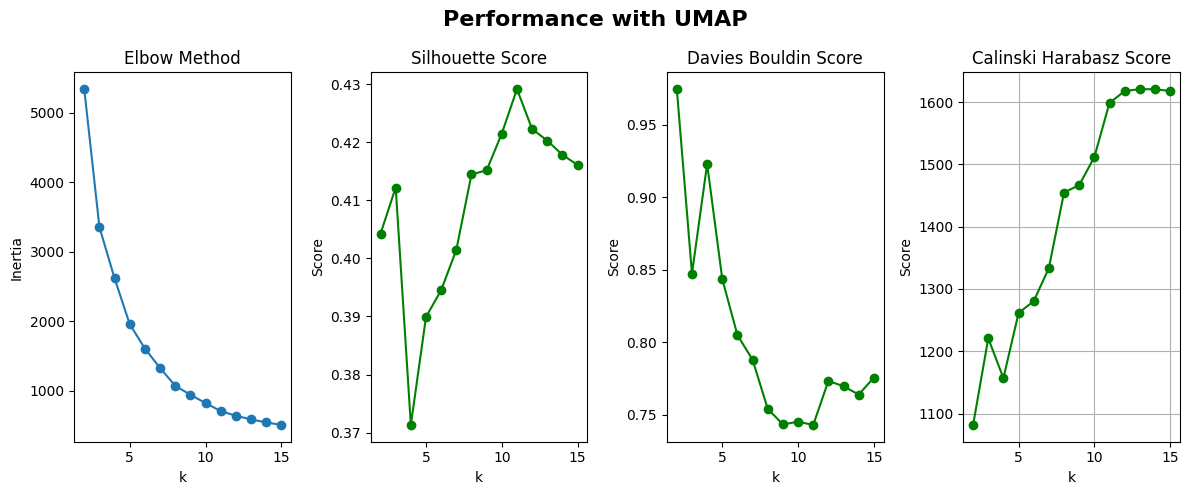

In [88]:
fig, axs = plt.subplots(1, 4, figsize=(12, 5))

fig.suptitle('Performance with UMAP', fontsize=16, fontweight='bold')

axs[0].plot(k_range, umap_inertia, marker='o')
axs[0].set_title('Elbow Method')
axs[0].set_xlabel('k')
axs[0].set_ylabel('Inertia')

axs[1].plot(k_range, umap_sil_k, marker='o', color='green')
axs[1].set_title('Silhouette Score')
axs[1].set_xlabel('k')
axs[1].set_ylabel('Score')

axs[2].plot(k_range, umap_dbi_k, marker='o', color='green')
axs[2].set_title('Davies Bouldin Score')
axs[2].set_xlabel('k')
axs[2].set_ylabel('Score')

axs[3].plot(k_range, umap_ch_k, marker='o', color='green')
axs[3].set_title('Calinski Harabasz Score')
axs[3].set_xlabel('k')
axs[3].set_ylabel('Score')

plt.tight_layout()
plt.grid()
plt.show()

### K-Means with t-SNE

In [89]:
tsne_inertia = []
tsne_sil_k = []
tsne_dbi_k = []
tsne_ch_k = []


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=30, n_init=10)
    kmeans.fit(tsne_df)
    tsne_inertia.append(kmeans.inertia_)
    tsne_sil_k.append(silhouette_score(tsne_df, kmeans.labels_))
    tsne_dbi_k.append(davies_bouldin_score(tsne_df, kmeans.labels_))
    tsne_ch_k.append(calinski_harabasz_score(tsne_df, kmeans.labels_))

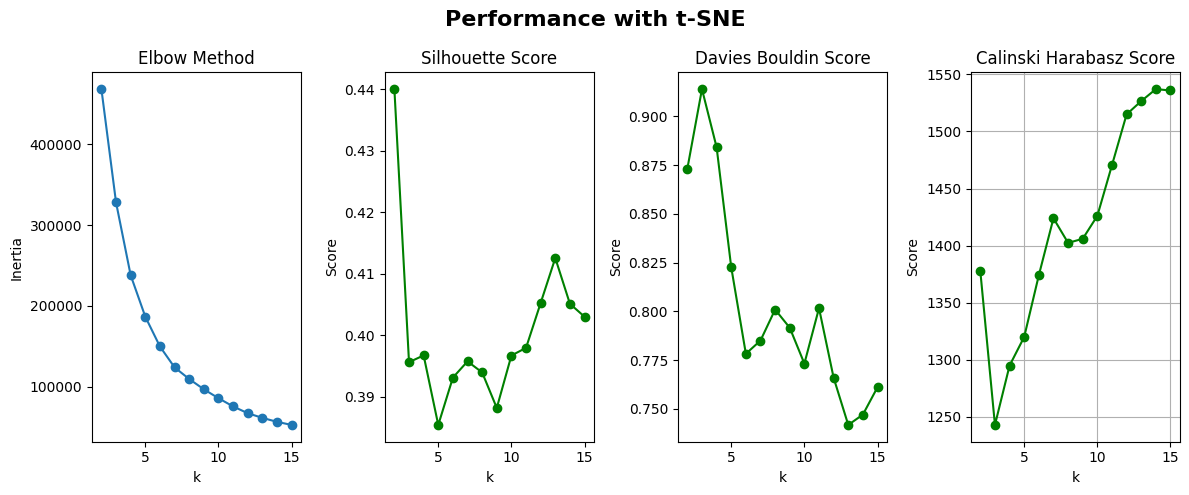

In [90]:

fig, axs = plt.subplots(1, 4, figsize=(12, 5))

fig.suptitle('Performance with t-SNE', fontsize=16, fontweight='bold')

axs[0].plot(k_range, tsne_inertia, marker='o')
axs[0].set_title('Elbow Method')
axs[0].set_xlabel('k')
axs[0].set_ylabel('Inertia')

axs[1].plot(k_range, tsne_sil_k, marker='o', color='green')
axs[1].set_title('Silhouette Score')
axs[1].set_xlabel('k')
axs[1].set_ylabel('Score')

axs[2].plot(k_range, tsne_dbi_k, marker='o', color='green')
axs[2].set_title('Davies Bouldin Score')
axs[2].set_xlabel('k')
axs[2].set_ylabel('Score')

axs[3].plot(k_range, tsne_ch_k, marker='o', color='green')
axs[3].set_title('Calinski Harabasz Score')
axs[3].set_xlabel('k')
axs[3].set_ylabel('Score')

plt.tight_layout()
plt.grid()
plt.show()

From trying PCA , t-SNE, and Uniform Manifold Approximation, UMAP was able to get a better score for a cluster (K=11)

In [91]:
sil_k_df = pd.DataFrame(umap_sil_k, index=k_range).reset_index(names=['K'])
sil_k_df.rename(columns={0:'Score'}, inplace=True)
maximum = sil_k_df['Score'].idxmax()

best_k = int(sil_k_df.loc[maximum][0])
sil_k_df.loc[maximum]

/tmp/ipython-input-91-1086649702.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



,9
K,11.000000
Score,0.429121


In [92]:
kmeans = KMeans(n_clusters=best_k, random_state=30, n_init=10)
kmeans.fit(umap_df)
sil_score_k = (silhouette_score(umap_df, kmeans.labels_))
dbi_score_k = (davies_bouldin_score(umap_df, kmeans.labels_))
ch_score_k = (calinski_harabasz_score(umap_df, kmeans.labels_))
k_cluster_size = np.unique(kmeans.labels_, return_counts=True)

print("Silhouette Score: ", round(sil_score_k *100, 2))
print("David Bouldin Score: ", round(dbi_score_k *100, 2))
print("Calinski Harabasz Score: ", ch_score_k)

Silhouette Score:  42.91
David Bouldin Score:  73.95
Calinski Harabasz Score:  1598.9425


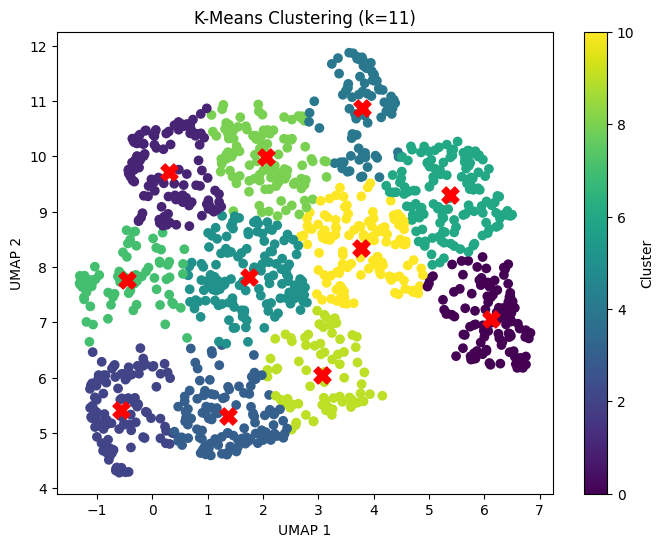

In [93]:
centers = []
for cluster_id in np.unique(kmeans.labels_):
    cluster_points = umap_df[kmeans.labels_ == cluster_id]
    center = cluster_points.mean(axis=0)
    centers.append(center)

centers = np.vstack(centers)

plt.figure(figsize=(8,6))
plt.scatter(umap_df.iloc[:,0], umap_df.iloc[:,1], c=kmeans.labels_, cmap='viridis')
plt.title(f"K-Means Clustering (k={best_k})")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Cluster')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, marker='X', label='Cluster Centers')

plt.show()

### Final K-Means Clustering Configuration

After experimenting with PCA, t-SNE, and UMAP embeddings, and evaluating K-Means Clustering using multiple `K` values and scores, the best configuration was:

- **Dimensionality Reduction**: `Uniform Manifold Applications`  
- **Clustering Method**: `K-Means Clustering `
- **Number of Clusters (K)**: `11 `
- **Silhouette Score (higher = better)**: `0.4291`
- **Davies-Bouldin Index (lower = better)**:` 0.7395 `
- **Calinski-Harabasz Score (higher = better)**: `1598.94`

The scatter plot confirms that there are 11 perfectly seperated clusters formed.


## Agglomerative Clustering

In [94]:
dimension_reduced = {'PCA': pca_df, 't-SNE': tsne_df, 'UMAP': umap_df}

for name, dim_red in dimension_reduced.items():
  best_metrics = {
        'silhouette': -1,
        'davies_bouldin': float('inf'),
        'calinski_harabasz': -1
        }
  best_params = {}
  best_model = None

  for n_clusters in range(2,21):
    for linkage_method in ['complete','average','ward']:
      aggcl = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
      agg_labels = aggcl.fit_predict(dim_red)

      if len(set(agg_labels)) < 2:
        continue

      sil_score = silhouette_score(dim_red, agg_labels)
      dbi_score = davies_bouldin_score(dim_red, agg_labels)
      ch_score = calinski_harabasz_score(dim_red, agg_labels)

      if sil_score > best_metrics['silhouette']:
        best_metrics = {
            'silhouette': sil_score,
            'davies_bouldin': dbi_score,
            'calinski_harabasz': ch_score
        }
        best_model = aggcl
        best_params = {
            'n_clusters': n_clusters,
            'linkage': linkage_method
        }

  best_n_clusters = best_params['n_clusters']
  best_linkage = best_params['linkage']
  print(f'\n{name}\n')
  print(f'Best number of cluster is {best_n_clusters}')
  print(f'Best linkage is {best_linkage}')

  print(f"Silhouette Score: {best_metrics['silhouette']:.4f} (higher = better)")
  print(f"Davies-Bouldin Index: {best_metrics['davies_bouldin']:.4f} (lower = better)")
  print(f"Calinski-Harabasz Score: {best_metrics['calinski_harabasz']:.2f} (higher = better)")


PCA

Best number of cluster is 2
Best linkage is average
Silhouette Score: 0.3364 (higher = better)
Davies-Bouldin Index: 1.0144 (lower = better)
Calinski-Harabasz Score: 19.63 (higher = better)

t-SNE

Best number of cluster is 2
Best linkage is complete
Silhouette Score: 0.4367 (higher = better)
Davies-Bouldin Index: 0.8798 (lower = better)
Calinski-Harabasz Score: 1358.30 (higher = better)

UMAP

Best number of cluster is 15
Best linkage is complete
Silhouette Score: 0.4018 (higher = better)
Davies-Bouldin Index: 0.7819 (lower = better)
Calinski-Harabasz Score: 1472.72 (higher = better)


t-SNE is the most appropriate for Agglomerative clustering with a good number of clusters, better silhouette score of 0.4367, and comparable Davies-Bouldin and Calinski-Harabasz Score with UMAP.

In [95]:
best_metrics = {
      'silhouette': -1,
      'davies_bouldin': float('inf'),
      'calinski_harabasz': -1
      }
best_params = {}
best_model = None

for n_clusters in range(2,21):
  for linkage in ['complete','average','ward']:
    aggcl = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    agg_labels = aggcl.fit_predict(tsne_df)

    if len(set(agg_labels)) < 2:
      continue

    sil_score = silhouette_score(tsne_df, agg_labels)
    dbi_score = davies_bouldin_score(tsne_df, agg_labels)
    ch_score = calinski_harabasz_score(tsne_df, agg_labels)

    if sil_score > best_metrics['silhouette']:
      best_metrics = {
          'silhouette': sil_score,
          'davies_bouldin': dbi_score,
          'calinski_harabasz': ch_score
      }
      best_model = aggcl
      best_params = {
          'n_clusters': n_clusters,
          'linkage': linkage
      }

best_n_clusters = best_params['n_clusters']
best_linkage = best_params['linkage']

print(f'Best number of cluster is {best_n_clusters}')
print(f'Best linkage is {best_linkage}')

print(f"Silhouette Score: {best_metrics['silhouette']:.4f} (higher = better)")
print(f"Davies-Bouldin Index: {best_metrics['davies_bouldin']:.4f} (lower = better)")
print(f"Calinski-Harabasz Score: {best_metrics['calinski_harabasz']:.2f} (higher = better)")

aggcl = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage)
agg_labels = aggcl.fit_predict(tsne_df)
sil_score_agg = silhouette_score(tsne_df, agg_labels)
dbi_score_agg = (davies_bouldin_score(tsne_df, agg_labels))
ch_score_agg = (calinski_harabasz_score(tsne_df, agg_labels))
agg_cluster_size = np.unique(agg_labels, return_counts=True)

Best number of cluster is 2
Best linkage is complete
Silhouette Score: 0.4367 (higher = better)
Davies-Bouldin Index: 0.8798 (lower = better)
Calinski-Harabasz Score: 1358.30 (higher = better)


### Plotting Dendogram

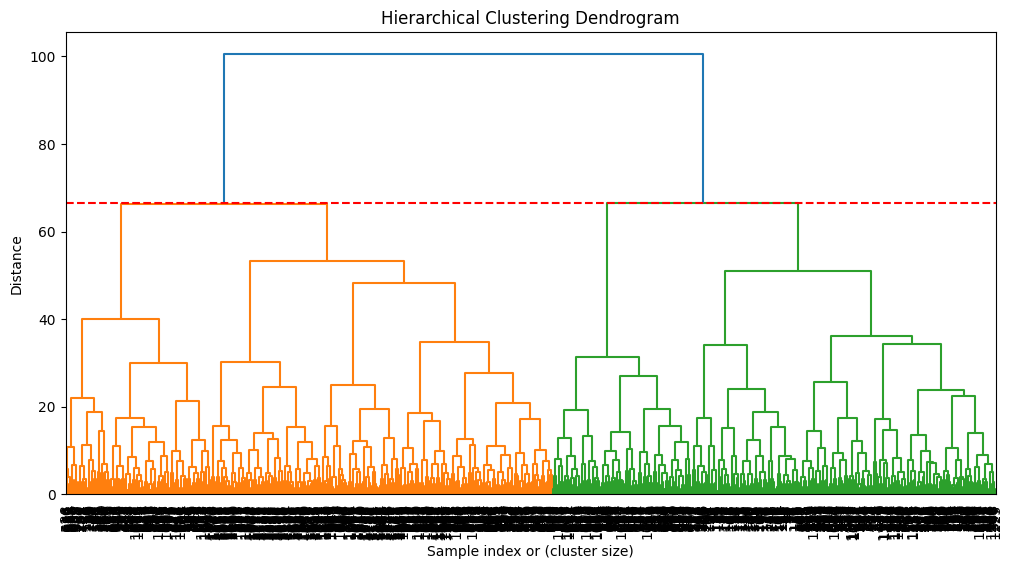

In [96]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linked = linkage(tsne_df, method=best_linkage)

thresholds = sorted(set(linked[:, 2]), reverse=True)
for t in thresholds:
    labels = fcluster(linked, t, criterion='distance')
    if len(set(labels)) == best_n_clusters:
        cutoff = t
        break

plt.figure(figsize=(12, 6))
dendrogram(linked,
           truncate_mode='level',
           p=30,
           leaf_rotation=90,
           leaf_font_size=10,
           show_contracted=True)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.axhline(y=cutoff, color='r', linestyle='--')
plt.show()

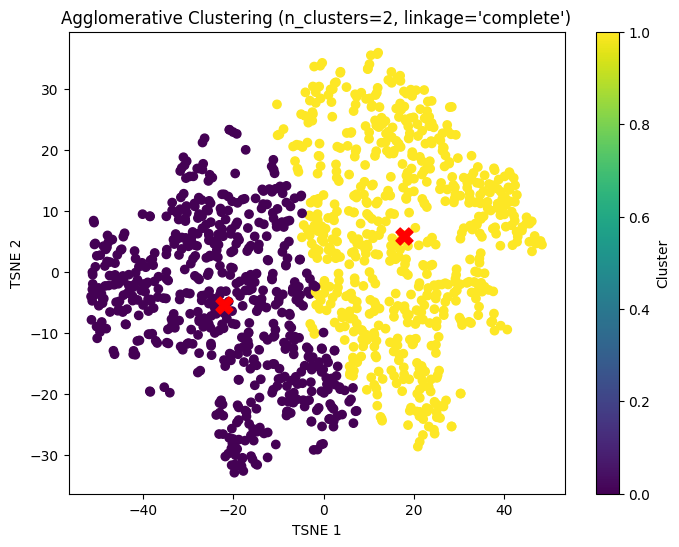

In [97]:
centers = []
for cluster_id in np.unique(agg_labels):
    cluster_points = tsne_df[agg_labels == cluster_id]
    center = cluster_points.mean(axis=0)
    centers.append(center)

centers = np.vstack(centers)

plt.figure(figsize=(8,6))
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=agg_labels, cmap='viridis')
plt.title(f"Agglomerative Clustering (n_clusters={best_n_clusters}, linkage='{best_linkage}')")
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.colorbar(label='Cluster')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, marker='X', label='Cluster Centers')

plt.show()

### Final Agglomerative Clustering Configuration

After experimenting with PCA, t-SNE, and UMAP embeddings, and evaluating Agglomerative Clustering using multiple linkage strategies and silhouette scores, the best configuration was:

- **Dimensionality Reduction**: `t-SNE`  
- **Clustering Method**: `Agglomerative Clustering`  
- **Linkage**: `Complete`  
- **Number of Clusters**: `2`  
- **Silhouette Score (higher = better)**: `0.437`  
- **Davies-Bouldin Index (lower = better)**: `0.8798`
- **Calinski-Harabasz Score (higher = better)**: `1358.30`


Both the dendrogram and the 2D t-SNE scatter plot confirm the presence of two well-separated clusters, validating the final model selection.


## DBSCAN

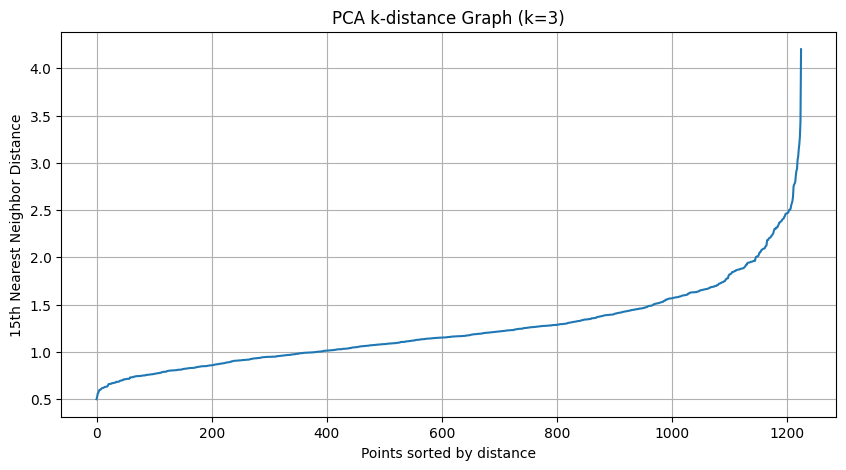

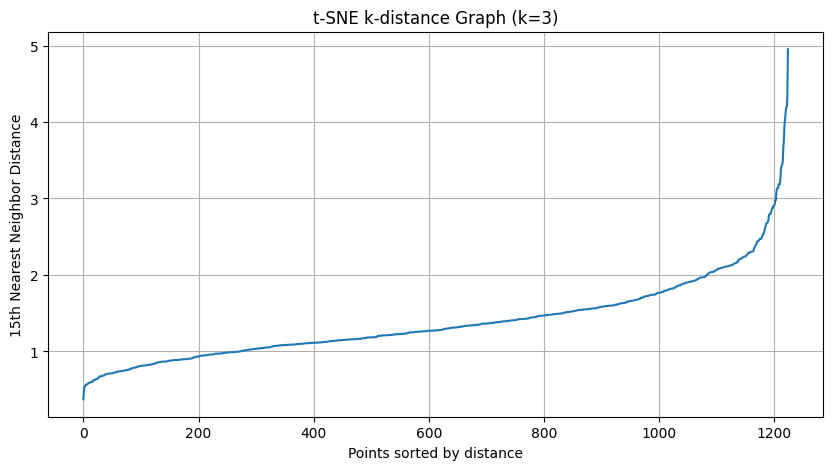

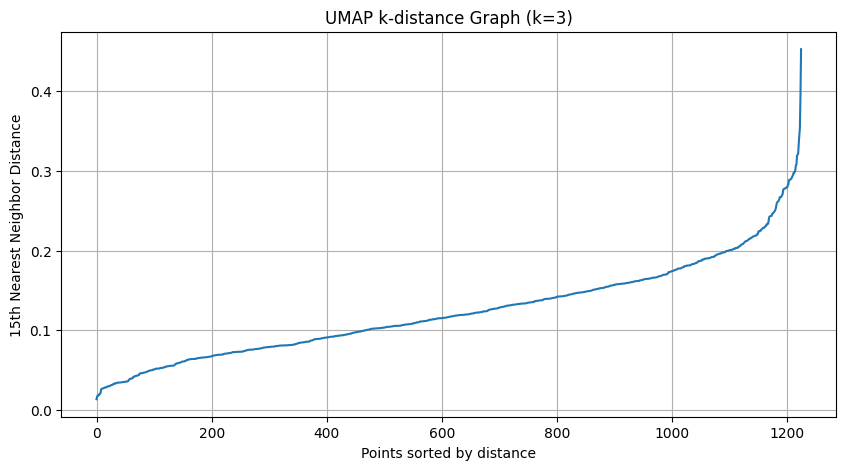

In [98]:
min_sample_range = 3

for name, dim_red in dimension_reduced.items():
  neighbors = NearestNeighbors(n_neighbors=min_sample_range)
  neighbors_fit = neighbors.fit(dim_red)
  distances, indices = neighbors_fit.kneighbors(dim_red)

  k_distances = np.sort(distances[:, min_sample_range-1])

  plt.figure(figsize=(10, 5))
  plt.plot(k_distances)
  plt.title(f'{name} k-distance Graph (k={min_sample_range})')
  plt.xlabel('Points sorted by distance')
  plt.ylabel(f'{k}th Nearest Neighbor Distance')
  plt.grid(True)
  plt.show()

In [99]:
eps_range = np.arange(0.1, 3.0, 0.1)
min_samples_range = range(3, 10)


for name, dim_red in dimension_reduced.items():
  best_score = -1
  best_model = None
  best_params = {}
  for eps in eps_range:
      for min_samples in min_samples_range:
          dbscan = DBSCAN(eps=eps, min_samples=min_samples)
          db_labels = dbscan.fit_predict(dim_red)

          unique_labels = set(db_labels)
          if -1 in unique_labels:
              unique_labels.remove(-1)

          cluster_sizes = np.bincount(db_labels[db_labels != -1])
          if len(cluster_sizes) < 2 or cluster_sizes.mean() < 15:
              continue

          noise_ratio = np.sum(db_labels == -1) / len(db_labels)
          if noise_ratio > 0.25:
              continue

          mask = db_labels != -1
          score = silhouette_score(dim_red[mask], db_labels[mask])

          if score > best_score:
              best_score = score
              best_model = dbscan
              best_params = {
                  'eps': eps,
                  'min_samples': min_samples
              }

  best_eps = best_params['eps']
  best_min_sample = best_params['min_samples']

  print(f'\n{name}\n')
  print(f'Best eps is {best_eps}')
  print(f'Best min_sample is {best_min_sample}')
  print(f'Score is {best_score}')


PCA

Best eps is 1.6
Best min_sample is 7
Score is 0.24302272068478561

t-SNE

Best eps is 2.6
Best min_sample is 8
Score is 0.3268948495388031

UMAP

Best eps is 0.2
Best min_sample is 6
Score is 0.44862955808639526


In [100]:
dbscan = DBSCAN(eps=0.2, min_samples=6)
db_labels = dbscan.fit_predict(umap_df)
mask = db_labels != -1
sil_score_db = silhouette_score(umap_df[mask], db_labels[mask])
dbi_score_db = (davies_bouldin_score(umap_df[mask], db_labels[mask]))
ch_score_db = (calinski_harabasz_score(umap_df[mask], db_labels[mask]))

print('Silhouette Score: ',sil_score_db)
print()
print('Davies-Bouldin Index: ', dbi_score_agg)
print()
print('Calinski-Harabasz Score: ', ch_score_agg)
print()

dbscan_cluster_size = np.unique(db_labels, return_counts=True)
print(dbscan_cluster_size)

Silhouette Score:  0.44862956

Davies-Bouldin Index:  0.8798282127914581

Calinski-Harabasz Score:  1358.295

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]), array([289,  10,  17,   9,  14,  14,  37,  12,  23,   6,  16,  10,  17,
        37,  21,  27,  51,  26,  21,   9,  18,  30,   5,  13,  10,  13,
        10,   4,  14,   6,  17,   9,  48,  10,   7,  11,   7,  21,  10,
        14,  25,   9,   6,  11,  17,  14,   6,   6,  14,  11,  10,   6,
        24,  11,   5,   6,   6,  37,   8,  26,   6,  18]))


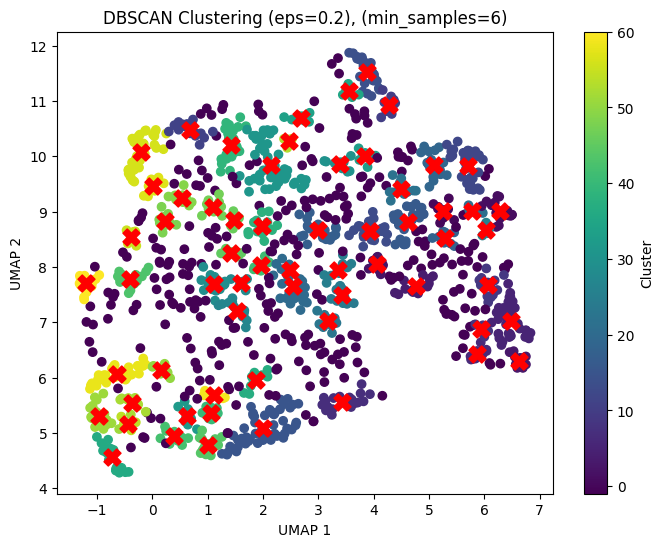

In [101]:
centers = []
for cluster_id in np.unique(db_labels):
    cluster_points = umap_df[db_labels == cluster_id]
    center = cluster_points.mean(axis=0)
    centers.append(center)

centers = np.vstack(centers)

plt.figure(figsize=(8,6))
plt.scatter(umap_df.iloc[:,0], umap_df.iloc[:,1], c=db_labels, cmap='viridis')
plt.title(f"DBSCAN Clustering (eps=0.2), (min_samples=6)")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Cluster')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, marker='X', label='Cluster Centers')

plt.show()

### Final DBSCAN Clustering Configuration

DBSCAN was applied after testing various dimensionality reduction techniques. While it successfully identified dense regions and outliers using **[UMAP / t-SNE / PCA]**, the overall clustering was not as interpretable or business-aligned as Agglomerative

- **Dimensionality Reduction**: `UMAP`  
- **Clustering Method**: `DBSCAN`  
- **eps**: `0.2`  
- **min_samples**: `6`  
- **Silhouette Score**: `0.4486`  
- **Davies-Bouldin Index (lower = better)**: `0.6299`
- **Calinski-Harabasz Score (higher = better)**: `1826.3528`

Despite good noise detection, the clustering lacked clear structure suitable for sector classification, making DBSCAN less ideal for this business context.


# Model Comparison

In [102]:
models_compared = {}

models_compared['K-Means'] = [best_k, sil_score_k, dbi_score_k, ch_score_k, 'Medium', np.sort(k_cluster_size[1])[::-1]]

models_compared['Agglomerative'] = [best_n_clusters, sil_score_agg, dbi_score_agg, ch_score_agg, 'High', np.sort(agg_cluster_size[1])[::-1]]

models_compared['DBSCAN'] = [len(dbscan_cluster_size[0]) -1, sil_score_db, dbi_score_db, ch_score_db, 'Low', np.sort(dbscan_cluster_size[1])[60::-1]]

models_compare = pd.DataFrame(models_compared).T

models_compare.columns = ['No of Clusters', 'Silhuoette Score', 'Davies-Bouldinx', 'Calinski-Harabasz Score', 'Interpretebility', 'Cluster Size']

In [103]:
models_compare

,No of Clusters,Silhuoette Score,Davies-Bouldinx,Calinski-Harabasz Score,Interpretebility,Cluster Size
K-Means,11,0.429143,0.739511,1598.942505,Medium,"[147, 141, 128, 118, 118, 115, 111, 111, 80, 7..."
Agglomerative,2,0.436713,0.879828,1358.295044,High,"[642, 583]"
DBSCAN,61,0.44863,0.629944,1826.352783,Low,"[51, 48, 37, 37, 37, 30, 27, 26, 26, 25, 24, 2..."


| Method         | Best Embedding | Clusters |  Outlier Handling |
|----------------|----------------|----------|-------------------|
| K-Means        | UMAP           | 11       |      ❌ Poor      |
| Agglomerative  | t-SNE          | 2        |       ❌ Poor     |
| DBSCAN         | UMAP         | 61 + noise |    ✅ Excellent   |

Each algorithm has strengths:
- **K-Means** is efficient but sensitive to outliers.
- **Agglomerative** provides interpretable clusters but scales poorly.
- **DBSCAN** is powerful for detecting noise and irregular shapes but requires careful tuning.

## ✅ Final Model Selection: Agglomerative Clustering

Agglomerative Clustering was chosen as the final model due to:

- **Business Objective**: To divide stocks into distinct sectors or groups based on financial and market behavior.
- **Interpretability**: Hierarchical structure and dendrograms clearly reflect relationships between companies.
- **Simplicity**: Only two clearly separable clusters were formed, which matched domain expectations.

While K-Means gave more clusters and DBSCAN handled outliers well, **Agglomerative Clustering provided the cleanest and most meaningful segmentation**.

# Profiling

In [104]:
import plotly.express as px

df_cleaned = df.reset_index(drop=True)
df_cleaned['agg_cluster'] = agg_labels
df_clustered = df_cleaned[df_cleaned['agg_cluster'] != -1]

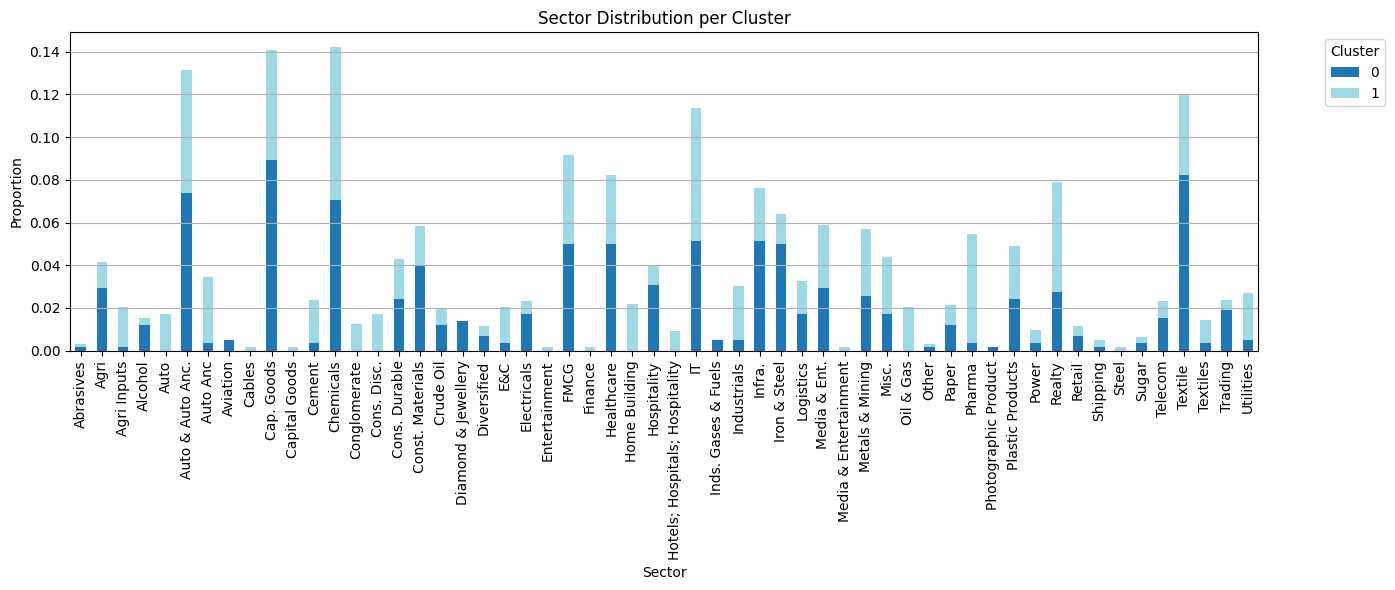

In [105]:
cluster_stats = df_clustered.groupby('agg_cluster')[num_cols].agg(['mean', 'median'])

sector_dist = df_clustered.groupby('agg_cluster')['Sector'].value_counts(normalize=True).unstack().fillna(0)


sector_dist.T.plot(kind='bar', figsize=(14, 6), stacked=True, colormap='tab20')
plt.title("Sector Distribution per Cluster")
plt.xlabel("Sector")
plt.ylabel("Proportion")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [106]:
# ---------- 6. OPTIONAL: SUNBURST PLOT ----------
fig = px.sunburst(
    df_clustered,
    path=['agg_cluster', 'Sector'],
    values='Market Cap' if 'Market Cap' in df_clustered.columns else None,
    title="Sunburst of Sector Distribution by Cluster"
)
fig.show()

In [107]:
cluster_0_sectors = sector_dist.loc[0][sector_dist.loc[0] > 0.05]
cluster_1_sectors = sector_dist.loc[1][sector_dist.loc[1] > 0.05]

cluster_0_df = (cluster_0_sectors * 100).sort_values(ascending=False).round(2).to_frame(name="Share (%)")
cluster_1_df = (cluster_1_sectors * 100).sort_values(ascending=False).round(2).to_frame(name="Share (%)")

print("=== Cluster 0 ===")
display(cluster_0_df)

print("\n=== Cluster 1 ===")
display(cluster_1_df)

=== Cluster 0 ===


,Share (%)
Sector,
Cap. Goods,8.92
Textile,8.23
Auto & Auto Anc.,7.38
Chemicals,7.03
IT,5.15
Infra.,5.15



=== Cluster 1 ===


,Share (%)
Sector,
Chemicals,7.17
IT,6.23
Auto & Auto Anc.,5.76
Cap. Goods,5.14
Pharma,5.14
Realty,5.14


In [108]:
for cluster_id, group in df_clustered.groupby('agg_cluster'):
    print(f"\n=== Cluster {cluster_id} Summary ===")
    print(group[num_cols].describe().T[['mean', '50%', 'std']].rename(columns={'50%': 'median'}))


=== Cluster 0 Summary ===
                             mean    median       std
Price                    4.258385  4.264790  1.273789
Market Cap               3.948309  3.831579  0.918663
Free Float Market Cap %  0.341035  0.330382  0.105719
6m ADV                   0.089632  0.045476  0.121568
RoE %                    0.019569  0.040849  0.123903
RoCE %                   0.069184  0.073302  0.089659
EBIT Margin %            0.033520  0.043570  0.071061
EPS                      4.554690  4.671232  0.969883
PAT %                    0.002009  0.013522  0.063697
Stock Return %           2.938555  3.056937  0.796861

=== Cluster 1 Summary ===
                             mean    median       std
Price                    5.691369  5.812411  1.046464
Market Cap               5.690342  5.892121  1.123409
Free Float Market Cap %  0.354018  0.349706  0.104375
6m ADV                   0.433411  0.373149  0.337311
RoE %                    0.135438  0.134133  0.108565
RoCE %                   0.1

### Cluster 0 Inference:
- Cluster 0 likely represents lower-cap, lower-efficiency firms.

- Stocks may be speculative or early-stage, with modest returns and low liquidity.

- Possibly includes turnaround companies or sectors with high fixed costs and low margins (e.g., infrastructure, manufacturing).


### Cluster 1 Inference:
- Cluster 1 likely includes established, profitable companies, possibly in finance, IT, FMCG.

- Good liquidity and returns suggest these are popular with institutional investors.

- Appears to be fundamentally strong picks.

| Feature             | Cluster 0 | Cluster 1      | Difference                         |
| ------------------- | --------- | -------------- | ---------------------------------- |
| **Market Cap**      | Lower     | Higher         | Cluster 1 = bigger companies       |
| **Liquidity (ADV)** | Very low  | High           | Cluster 1 more investable          |
| **Profitability**   | Weak      | Strong         | Cluster 1 = better business models |
| **Returns**         | \~2.94%   | \~3.16%        | Slightly higher in Cluster 1       |
| **EPS**             | Higher    | Slightly lower | Cluster 0 may have outliers        |


🧾 Summary in Plain Words:
- Cluster 0: Smaller, less liquid, lower-profit firms — possibly speculative or emerging.

- Cluster 1: Larger, profitable, liquid firms — potentially blue-chip or institutional favorites.

Even though both have similar stock returns, Cluster 1 is fundamentally much stronger, which makes it less risky and more investable in practice.

# Clustering Approach Summary

| Algorithm     | Key Strength                       | Limitations                                   | Best Use Case                            |
| ------------- | ---------------------------------- | --------------------------------------------- | ---------------------------------------- |
| K-Means       | Fast & scalable                    | Poor with outliers and non-spherical clusters | When clusters are spherical and balanced |
| Agglomerative | No need to predefine k             | Not scalable for large datasets               | Small to mid-sized data with hierarchy   |
| DBSCAN        | Detects noise and arbitrary shapes | Fails with varying density & parameter tuning | Data with noise and non-convex shapes    |
